# Chapter Three - Data 

- This notebook contains the Data preparation steps and the visualisations created for the EDA section and presentations.
- The cleaned dataset is output as a csv file in the cleaned_data folder
- Some charts may not be present in the final report or presentation, as there are too many.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the transactions dataset and display the first five rows.
transactions = pd.read_csv('Raw/transactions_data.csv')

# Drop Zip column as it will not be used. 
transactions.drop(columns = 'zip',inplace=True)

transactions.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,5813,NaN


# Subsetting the Data 
Creating a subset of the dataset with the following criteria:
- Years between 2015 to 2019.
- Top 5 Countries with the most number of transactions. 
- The top 5 countries with the highest number of transactions are : 'USA', 'Mexico', 'Italy', 'Canada' and 'United Kingdom'
- Online transactions without country information are also kept.

In [3]:
# Subsetting based on transactions occuring between the years 2015 to 2019.

transactions['date'] = pd.to_datetime(transactions['date'])
transactions = transactions[(transactions['date'].dt.year>= 2015) & (transactions['date'].dt.year <= 2019)] 

print(transactions.shape)

(6734248, 11)


In [4]:
# Cleaning up the merchant state column by recategorising US states at the country level.
# This is to ensure consistency as transactions in other countries are given at the country level in the merchant_state column.

US_states_list=['AA','AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA',
'HI','IA','ID','IL','IN','KS','KY','LA','MA','MD',
'ME','MI','MN','MO','MS','MT','NC','ND','NE','NH',
'NJ','NM','NV','NY','OH','OK','OR','PA','RI','SC',
'SD','TN','TX','UT','VA','VT','WA','WI','WV','WY']

# Recategorise all USA states as USA
def merchant_country_cleanup(state):
    if state in US_states_list:
        return 'USA'
    else:
        return state
    
transactions['merchant_state'] = transactions['merchant_state'].apply(merchant_country_cleanup)

# Subsetting based on transactions occuring in USA, Mexico, Italy, Canada and United Kingdom
# Online transactions are also kept.
transactions = transactions[transactions['merchant_state'].isin(['USA','Mexico','Italy','Canada','United Kingdom']) | transactions['merchant_state'].isna()]

# Rename merchant_state to merchant_country to better reflect the meaning of the column.
transactions.rename({'merchant_state': 'merchant_country'},inplace=True)

print(transactions.shape)

(6714487, 11)


In [5]:
transactions.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,errors
6571667,15471192,2015-01-01 00:01:00,316,2038,$69.55,Chip Transaction,79360,Giddings,USA,5411,NaN
6571668,15471193,2015-01-01 00:01:00,1585,339,$34.82,Swipe Transaction,69972,Jacksonville,USA,5814,NaN
6571669,15471194,2015-01-01 00:03:00,848,3915,$64.40,Chip Transaction,13051,Harwood,USA,5813,NaN
6571670,15471195,2015-01-01 00:04:00,1797,300,$47.93,Chip Transaction,54343,San Leandro,USA,4121,NaN
6571671,15471196,2015-01-01 00:05:00,1557,2471,$25.75,Online Transaction,9932,ONLINE,NaN,5311,NaN


In [6]:
# Import the fraud labels dataset and display the first five rows.

fraud_labels = pd.read_json('Raw/train_fraud_labels.json')
fraud_labels.head()

,target
10649266,No
23410063,No
9316588,No
12478022,No
9558530,No


In [7]:
# Data Wrangling 1 - Joining the fraud labels to the transactions dataset based on the transaction id.

df = transactions.merge(fraud_labels, left_on='id', right_index=True, how='inner')
df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,errors,target
6571668,15471193,2015-01-01 00:01:00,1585,339,$34.82,Swipe Transaction,69972,Jacksonville,USA,5814,NaN,No
6571669,15471194,2015-01-01 00:03:00,848,3915,$64.40,Chip Transaction,13051,Harwood,USA,5813,NaN,No
6571670,15471195,2015-01-01 00:04:00,1797,300,$47.93,Chip Transaction,54343,San Leandro,USA,4121,NaN,No
6571671,15471196,2015-01-01 00:05:00,1557,2471,$25.75,Online Transaction,9932,ONLINE,NaN,5311,NaN,No
6571672,15471197,2015-01-01 00:06:00,1684,94,$28.63,Online Transaction,39021,ONLINE,NaN,4784,NaN,No


In [8]:
df.shape

(4498909, 12)

In [9]:
# Import the merchant category codes dataset and display the first five rows.

user_details = pd.read_csv('Raw/users_data.csv')
user_details.drop(columns=['address','birth_year','birth_month','latitude','longitude'], inplace=True)
user_details.head()

,id,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,Female,$29278,$59696,$127613,787,5
1,1746,53,68,Female,$37891,$77254,$191349,701,5
2,1718,81,67,Female,$22681,$33483,$196,698,5
3,708,63,63,Female,$163145,$249925,$202328,722,4
4,1164,43,70,Male,$53797,$109687,$183855,675,1


In [10]:
# Data Wrangling 2 - Joining the user details to the transactions dataset based on the client id.

df = df.merge(user_details, left_on='client_id', right_on='id', how='left')
df.head()

,id_x,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,...,target,id_y,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,15471193,2015-01-01 00:01:00,1585,339,$34.82,Swipe Transaction,69972,Jacksonville,USA,5814,...,No,1585,35,69,Female,$20710,$42229,$0,688,3
1,15471194,2015-01-01 00:03:00,848,3915,$64.40,Chip Transaction,13051,Harwood,USA,5813,...,No,848,51,69,Male,$33529,$68362,$96182,711,2
2,15471195,2015-01-01 00:04:00,1797,300,$47.93,Chip Transaction,54343,San Leandro,USA,4121,...,No,1797,67,65,Male,$24971,$30962,$15336,743,5
3,15471196,2015-01-01 00:05:00,1557,2471,$25.75,Online Transaction,9932,ONLINE,NaN,5311,...,No,1557,50,66,Female,$23687,$48295,$109558,707,3
4,15471197,2015-01-01 00:06:00,1684,94,$28.63,Online Transaction,39021,ONLINE,NaN,4784,...,No,1684,56,65,Male,$13668,$27861,$108313,782,5


In [11]:
# Cleaning up the duplicated id_y column created during the join.
df.drop(columns = ['id_y'],inplace = True)
# Rename the 'id_x' column to 'transaction_id'
df = df.rename(columns={'id_x': 'transaction_id'})

In [12]:
df.isna().any()

transaction_id       False
date                 False
client_id            False
card_id              False
amount               False
use_chip             False
merchant_id          False
merchant_city        False
merchant_state        True
mcc                  False
errors                True
target               False
current_age          False
retirement_age       False
gender               False
per_capita_income    False
yearly_income        False
total_debt           False
credit_score         False
num_credit_cards     False
dtype: bool

In [13]:
# Import the merchant category codes dataset and display the first five rows.

mcc_codes = pd.read_json('Raw/mcc_codes.json',orient='index')
mcc_codes.columns = ['merchant_category']
mcc_codes.reset_index(inplace=True)

mcc_codes.head()

,index,merchant_category
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees


In [14]:
# Data Wrangling 3 - Joining the mcc codes to the transactions dataset based on the mcc.

df = df.merge(mcc_codes, left_on='mcc', right_on='index', how='left')
df.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,...,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,index,merchant_category
0,15471193,2015-01-01 00:01:00,1585,339,$34.82,Swipe Transaction,69972,Jacksonville,USA,5814,...,35,69,Female,$20710,$42229,$0,688,3,5814,Fast Food Restaurants
1,15471194,2015-01-01 00:03:00,848,3915,$64.40,Chip Transaction,13051,Harwood,USA,5813,...,51,69,Male,$33529,$68362,$96182,711,2,5813,Drinking Places (Alcoholic Beverages)
2,15471195,2015-01-01 00:04:00,1797,300,$47.93,Chip Transaction,54343,San Leandro,USA,4121,...,67,65,Male,$24971,$30962,$15336,743,5,4121,Taxicabs and Limousines
3,15471196,2015-01-01 00:05:00,1557,2471,$25.75,Online Transaction,9932,ONLINE,NaN,5311,...,50,66,Female,$23687,$48295,$109558,707,3,5311,Department Stores
4,15471197,2015-01-01 00:06:00,1684,94,$28.63,Online Transaction,39021,ONLINE,NaN,4784,...,56,65,Male,$13668,$27861,$108313,782,5,4784,Tolls and Bridge Fees


In [15]:
# Drop redundant mcc code columns
df = df.drop(columns =['mcc','index'])

In [16]:
# Checking the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4498909 entries, 0 to 4498908
Data columns (total 20 columns):
 #   Column             Dtype         
---  ------             -----         
 0   transaction_id     int64         
 1   date               datetime64[ns]
 2   client_id          int64         
 3   card_id            int64         
 4   amount             object        
 5   use_chip           object        
 6   merchant_id        int64         
 7   merchant_city      object        
 8   merchant_state     object        
 9   errors             object        
 10  target             object        
 11  current_age        int64         
 12  retirement_age     int64         
 13  gender             object        
 14  per_capita_income  object        
 15  yearly_income      object        
 16  total_debt         object        
 17  credit_score       int64         
 18  num_credit_cards   int64         
 19  merchant_category  object        
dtypes: datetime64[ns](1), in

In [17]:
# Checking for missing values.
df.isnull().any()

transaction_id       False
date                 False
client_id            False
card_id              False
amount               False
use_chip             False
merchant_id          False
merchant_city        False
merchant_state        True
errors                True
target               False
current_age          False
retirement_age       False
gender               False
per_capita_income    False
yearly_income        False
total_debt           False
credit_score         False
num_credit_cards     False
merchant_category    False
dtype: bool

# Cleaning data

In [18]:
# Removing the dollar sign ($) prefix from columns with monetary values.
def clean_amount(value_string):
    value_string = value_string.replace('$', '')
    return float(value_string)

df['amount'] = df['amount'].apply(clean_amount)
df['per_capita_income'] = df['per_capita_income'].apply(clean_amount)
df['yearly_income'] = df['yearly_income'].apply(clean_amount)
df['total_debt'] = df['total_debt'].apply(clean_amount)

In [19]:
# Handle missing values in error column with 'NONE'.
# This represents a new category where no errors were eoncutered.
df['errors'] = df['errors'].fillna('NONE')

# Convert the column to category
df['errors'] = df['errors'].astype('category')

In [20]:
df[(df['merchant_state'].isna())].head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,errors,target,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,merchant_category
3,15471196,2015-01-01 00:05:00,1557,2471,25.75,Online Transaction,9932,ONLINE,NaN,NONE,No,50,66,Female,23687.0,48295.0,109558.0,707,3,Department Stores
4,15471197,2015-01-01 00:06:00,1684,94,28.63,Online Transaction,39021,ONLINE,NaN,NONE,No,56,65,Male,13668.0,27861.0,108313.0,782,5,Tolls and Bridge Fees
7,15471202,2015-01-01 00:14:00,335,5131,318.05,Online Transaction,50292,ONLINE,NaN,NONE,No,46,68,Female,27696.0,56467.0,66565.0,688,3,"Athletic Fields, Commercial Sports"
8,15471203,2015-01-01 00:15:00,1772,2283,28.43,Online Transaction,15143,ONLINE,NaN,NONE,No,47,70,Male,24603.0,50163.0,97188.0,761,4,Tolls and Bridge Fees
10,15471208,2015-01-01 00:21:00,1560,5455,9.74,Online Transaction,9932,ONLINE,NaN,NONE,No,61,60,Female,18849.0,18452.0,16827.0,741,6,Department Stores


In [21]:
df[(df['merchant_state'].isna()) & (df['merchant_city'] != 'ONLINE')]

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,errors,target,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,merchant_category


In [22]:
# Handle missing values in merchant_state column with 'ONLINE'.
# Since all missing values in merchant_state arise to online transactions.
df['merchant_state'] = df['merchant_state'].fillna('ONLINE')

In [23]:
# Map target values whereby 'Yes' = 1 and 'No' = 0
df['target'] = df['target'].map({'No': 0 , 'Yes': 1})

In [24]:
# Convert all categorical columns  with object data type to category data type.
categorical_cols = ['use_chip','merchant_city','merchant_state','gender','merchant_category']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [25]:
# remove negative values from amount column
df = df[df['amount'] > 0]

In [26]:
# Checking the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4275128 entries, 0 to 4498908
Data columns (total 20 columns):
 #   Column             Dtype         
---  ------             -----         
 0   transaction_id     int64         
 1   date               datetime64[ns]
 2   client_id          int64         
 3   card_id            int64         
 4   amount             float64       
 5   use_chip           category      
 6   merchant_id        int64         
 7   merchant_city      category      
 8   merchant_state     category      
 9   errors             category      
 10  target             int64         
 11  current_age        int64         
 12  retirement_age     int64         
 13  gender             category      
 14  per_capita_income  float64       
 15  yearly_income      float64       
 16  total_debt         float64       
 17  credit_score       int64         
 18  num_credit_cards   int64         
 19  merchant_category  category      
dtypes: category(6), datetime64[ns

In [27]:
# Checking for missing values.
df.isnull().any()

transaction_id       False
date                 False
client_id            False
card_id              False
amount               False
use_chip             False
merchant_id          False
merchant_city        False
merchant_state       False
errors               False
target               False
current_age          False
retirement_age       False
gender               False
per_capita_income    False
yearly_income        False
total_debt           False
credit_score         False
num_credit_cards     False
merchant_category    False
dtype: bool

## Removing unnecessary columns

In [28]:
df.reset_index(drop = True, inplace=True)

In [29]:
df.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,errors,target,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,merchant_category
0,15471193,2015-01-01 00:01:00,1585,339,34.82,Swipe Transaction,69972,Jacksonville,USA,NONE,0,35,69,Female,20710.0,42229.0,0.0,688,3,Fast Food Restaurants
1,15471194,2015-01-01 00:03:00,848,3915,64.40,Chip Transaction,13051,Harwood,USA,NONE,0,51,69,Male,33529.0,68362.0,96182.0,711,2,Drinking Places (Alcoholic Beverages)
2,15471195,2015-01-01 00:04:00,1797,300,47.93,Chip Transaction,54343,San Leandro,USA,NONE,0,67,65,Male,24971.0,30962.0,15336.0,743,5,Taxicabs and Limousines
3,15471196,2015-01-01 00:05:00,1557,2471,25.75,Online Transaction,9932,ONLINE,ONLINE,NONE,0,50,66,Female,23687.0,48295.0,109558.0,707,3,Department Stores
4,15471197,2015-01-01 00:06:00,1684,94,28.63,Online Transaction,39021,ONLINE,ONLINE,NONE,0,56,65,Male,13668.0,27861.0,108313.0,782,5,Tolls and Bridge Fees


## Tidying up the dataframe
-Renaming column headers and rearranging the order of columns

In [30]:
df.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'errors', 'target',
       'current_age', 'retirement_age', 'gender', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards',
       'merchant_category'],
      dtype='object')

In [31]:
# Reorder columns based on the type of information
# The order is based on ID columns , transaction details, merchant details, followed by demographic data and the target.
new_col_order = ['transaction_id', 'client_id', 'card_id', 'merchant_id',
 'date', 'amount', 'use_chip', 'errors','merchant_city', 'merchant_state', 'merchant_category', 
 'current_age', 'retirement_age', 'gender','per_capita_income', 'yearly_income', 
 'total_debt', 'credit_score','num_credit_cards', 'target']

df = df[new_col_order]

df.head()

,transaction_id,client_id,card_id,merchant_id,date,amount,use_chip,errors,merchant_city,merchant_state,merchant_category,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,target
0,15471193,1585,339,69972,2015-01-01 00:01:00,34.82,Swipe Transaction,NONE,Jacksonville,USA,Fast Food Restaurants,35,69,Female,20710.0,42229.0,0.0,688,3,0
1,15471194,848,3915,13051,2015-01-01 00:03:00,64.40,Chip Transaction,NONE,Harwood,USA,Drinking Places (Alcoholic Beverages),51,69,Male,33529.0,68362.0,96182.0,711,2,0
2,15471195,1797,300,54343,2015-01-01 00:04:00,47.93,Chip Transaction,NONE,San Leandro,USA,Taxicabs and Limousines,67,65,Male,24971.0,30962.0,15336.0,743,5,0
3,15471196,1557,2471,9932,2015-01-01 00:05:00,25.75,Online Transaction,NONE,ONLINE,ONLINE,Department Stores,50,66,Female,23687.0,48295.0,109558.0,707,3,0
4,15471197,1684,94,39021,2015-01-01 00:06:00,28.63,Online Transaction,NONE,ONLINE,ONLINE,Tolls and Bridge Fees,56,65,Male,13668.0,27861.0,108313.0,782,5,0


In [32]:
df.rename(columns = {'date':'transaction_datetime','amount':'transaction_amount'}, inplace = True)

In [33]:
# Dataframe df with new column names
df.columns

Index(['transaction_id', 'client_id', 'card_id', 'merchant_id',
       'transaction_datetime', 'transaction_amount', 'use_chip', 'errors',
       'merchant_city', 'merchant_state', 'merchant_category', 'current_age',
       'retirement_age', 'gender', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'target'],
      dtype='object')

## Outlier detection


In [34]:
def detect_outliers_iqr(df):
    
    outlier_counts = {}
    
    # Manually define numeric cols as some columns like transaction_id are interpreted wrongly as numeric
    
    numeric_cols = ['transaction_amount','current_age','retirement_age',
                'per_capita_income','yearly_income','total_debt','credit_score','num_credit_cards']
    
    for col in df[numeric_cols]:  
        # Calculate Q1 (10th percentile) and Q3 (90th percentile)
        Q1 = df[col].quantile(0.10)
        Q3 = df[col].quantile(0.90)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

    # Print the count of outliers for each column
    for col, count in outlier_counts.items():
        print(f"Column '{col}' has {count} outliers.")
        
# Detect and print outliers
detect_outliers_iqr(df)

Column 'transaction_amount' has 60925 outliers.
Column 'current_age' has 0 outliers.
Column 'retirement_age' has 0 outliers.
Column 'per_capita_income' has 46131 outliers.
Column 'yearly_income' has 39998 outliers.
Column 'total_debt' has 13964 outliers.
Column 'credit_score' has 0 outliers.
Column 'num_credit_cards' has 0 outliers.


In [35]:
def remove_outliers(df):
    numeric_cols = ['transaction_amount','current_age','retirement_age',
                'per_capita_income','yearly_income','total_debt','credit_score','num_credit_cards']
    
    for col in df[numeric_cols]:  
        # Calculate Q1 (10th percentile) and Q3 (90th percentile)
        Q1 = df[col].quantile(0.10)
        Q3 = df[col].quantile(0.90)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        filtered_df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        return filtered_df

df = remove_outliers(df)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4214203 entries, 0 to 4275127
Data columns (total 20 columns):
 #   Column                Dtype         
---  ------                -----         
 0   transaction_id        int64         
 1   client_id             int64         
 2   card_id               int64         
 3   merchant_id           int64         
 4   transaction_datetime  datetime64[ns]
 5   transaction_amount    float64       
 6   use_chip              category      
 7   errors                category      
 8   merchant_city         category      
 9   merchant_state        category      
 10  merchant_category     category      
 11  current_age           int64         
 12  retirement_age        int64         
 13  gender                category      
 14  per_capita_income     float64       
 15  yearly_income         float64       
 16  total_debt            float64       
 17  credit_score          int64         
 18  num_credit_cards      int64         
 19  targe

In [37]:
df.head()

,transaction_id,client_id,card_id,merchant_id,transaction_datetime,transaction_amount,use_chip,errors,merchant_city,merchant_state,merchant_category,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,target
0,15471193,1585,339,69972,2015-01-01 00:01:00,34.82,Swipe Transaction,NONE,Jacksonville,USA,Fast Food Restaurants,35,69,Female,20710.0,42229.0,0.0,688,3,0
1,15471194,848,3915,13051,2015-01-01 00:03:00,64.40,Chip Transaction,NONE,Harwood,USA,Drinking Places (Alcoholic Beverages),51,69,Male,33529.0,68362.0,96182.0,711,2,0
2,15471195,1797,300,54343,2015-01-01 00:04:00,47.93,Chip Transaction,NONE,San Leandro,USA,Taxicabs and Limousines,67,65,Male,24971.0,30962.0,15336.0,743,5,0
3,15471196,1557,2471,9932,2015-01-01 00:05:00,25.75,Online Transaction,NONE,ONLINE,ONLINE,Department Stores,50,66,Female,23687.0,48295.0,109558.0,707,3,0
4,15471197,1684,94,39021,2015-01-01 00:06:00,28.63,Online Transaction,NONE,ONLINE,ONLINE,Tolls and Bridge Fees,56,65,Male,13668.0,27861.0,108313.0,782,5,0


In [38]:
# Save combined and cleaned Dataset as a backup in csv format. 
# df.to_csv('cleaned_data/combined_dataset_cleaned.csv',index = False)

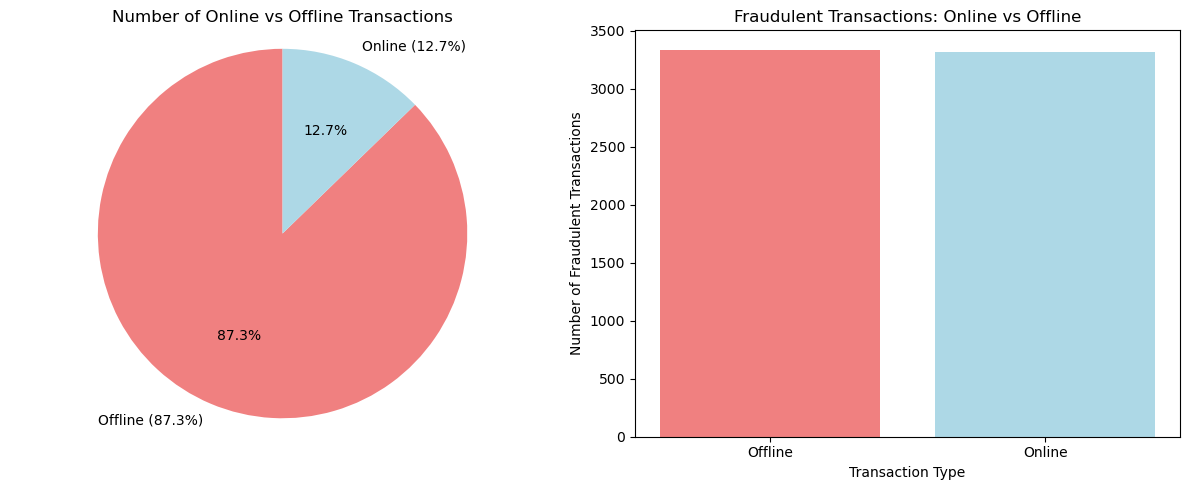

In [39]:
# Classify as Online or Offline
df['transaction_type'] = df['merchant_state'].apply(lambda x: 'Online' if x == 'ONLINE' else 'Offline')

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Pie Chart: Total Transaction Distribution
counts = df['transaction_type'].value_counts()
proportions = df['transaction_type'].value_counts(normalize=True) * 100  # percentage

ax[0].pie(counts, 
          labels=[f'{label} ({proportions[label]:.1f}%)' for label in counts.index],
          autopct='%1.1f%%', 
          startangle=90,
          colors=['lightcoral', 'lightblue'])
ax[0].set_title('Number of Online vs Offline Transactions')
ax[0].axis('equal')  

# Bar Chart: Fraudulent Transactions Only 
fraud_df = df[df['target'] == 1]
fraud_counts = fraud_df['transaction_type'].value_counts()

ax[1].bar(fraud_counts.index, fraud_counts.values, color=['lightcoral', 'lightblue'])
ax[1].set_title('Fraudulent Transactions: Online vs Offline')
ax[1].set_xlabel('Transaction Type')
ax[1].set_ylabel('Number of Fraudulent Transactions')

plt.tight_layout()
plt.show()

In [40]:
df_offline = df[df['transaction_type'] == 'Offline']
df_online = df[df['transaction_type'] == 'Online']

In [41]:
df_offline.head()

,transaction_id,client_id,card_id,merchant_id,transaction_datetime,transaction_amount,use_chip,errors,merchant_city,merchant_state,...,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,target,transaction_type
0,15471193,1585,339,69972,2015-01-01 00:01:00,34.82,Swipe Transaction,NONE,Jacksonville,USA,...,35,69,Female,20710.0,42229.0,0.0,688,3,0,Offline
1,15471194,848,3915,13051,2015-01-01 00:03:00,64.40,Chip Transaction,NONE,Harwood,USA,...,51,69,Male,33529.0,68362.0,96182.0,711,2,0,Offline
2,15471195,1797,300,54343,2015-01-01 00:04:00,47.93,Chip Transaction,NONE,San Leandro,USA,...,67,65,Male,24971.0,30962.0,15336.0,743,5,0,Offline
5,15471199,641,4718,50867,2015-01-01 00:10:00,86.66,Chip Transaction,NONE,Columbus,USA,...,62,68,Male,18420.0,37556.0,0.0,735,6,0,Offline
6,15471200,940,5396,78644,2015-01-01 00:11:00,140.10,Chip Transaction,NONE,Las Vegas,USA,...,49,61,Female,20499.0,41800.0,67836.0,699,6,0,Offline


In [42]:
df_online.head()

,transaction_id,client_id,card_id,merchant_id,transaction_datetime,transaction_amount,use_chip,errors,merchant_city,merchant_state,...,current_age,retirement_age,gender,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,target,transaction_type
3,15471196,1557,2471,9932,2015-01-01 00:05:00,25.75,Online Transaction,NONE,ONLINE,ONLINE,...,50,66,Female,23687.0,48295.0,109558.0,707,3,0,Online
4,15471197,1684,94,39021,2015-01-01 00:06:00,28.63,Online Transaction,NONE,ONLINE,ONLINE,...,56,65,Male,13668.0,27861.0,108313.0,782,5,0,Online
8,15471203,1772,2283,15143,2015-01-01 00:15:00,28.43,Online Transaction,NONE,ONLINE,ONLINE,...,47,70,Male,24603.0,50163.0,97188.0,761,4,0,Online
10,15471208,1560,5455,9932,2015-01-01 00:21:00,9.74,Online Transaction,NONE,ONLINE,ONLINE,...,61,60,Female,18849.0,18452.0,16827.0,741,6,0,Online
13,15471215,488,5413,34256,2015-01-01 00:28:00,34.27,Online Transaction,NONE,ONLINE,ONLINE,...,34,69,Male,15758.0,32126.0,54351.0,745,2,0,Online


C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\805124589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offline.loc[:, 'age_group'] = pd.cut(df_offline['current_age'], bins=bins, labels=labels, right=False)
C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\805124589.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_offline.groupby('age_group')['target'].mean().reset_index()
C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\805124589.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

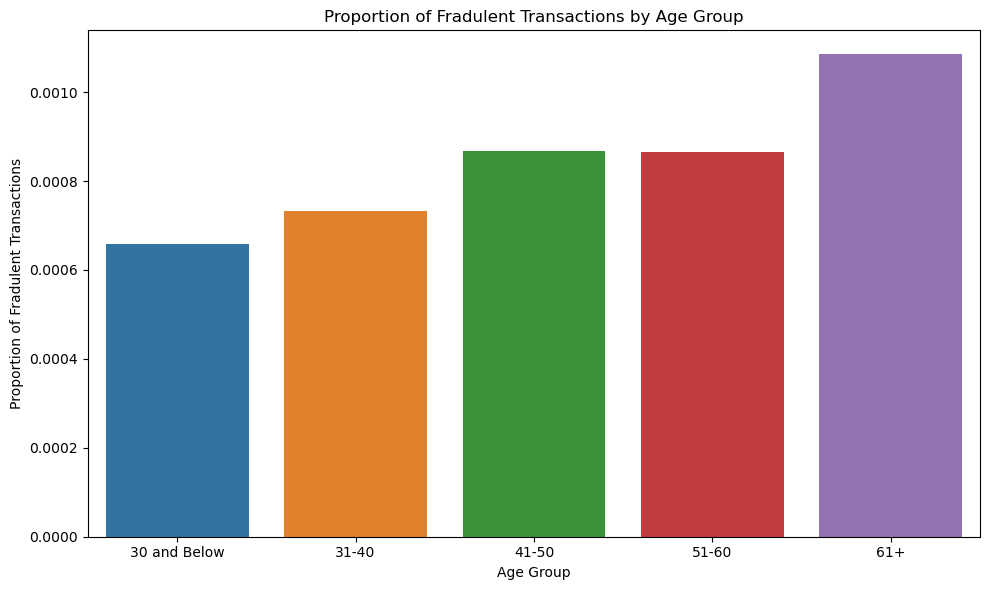

In [43]:
# Create age groups
bins = [0, 30, 40, 50, 60, 120]  # Define age group ranges
labels = ['30 and Below', '31-40', '41-50', '51-60', '61+']
df_offline.loc[:, 'age_group'] = pd.cut(df_offline['current_age'], bins=bins, labels=labels, right=False)

# Calculate the proportion of target = 1 for each age group
grouped = df_offline.groupby('age_group')['target'].mean().reset_index()

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='target', data=grouped, palette='tab10')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Proportion of Fradulent Transactions')
plt.title('Proportion of Fradulent Transactions by Age Group')

plt.tight_layout()
plt.show()

C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\1581295601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offline.loc[:,'income_group'] = pd.cut(df_offline['yearly_income'], bins=bins, labels=labels, right=False)
C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\1581295601.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_offline.groupby('income_group')['target'].mean().reset_index()
C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\1581295601.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

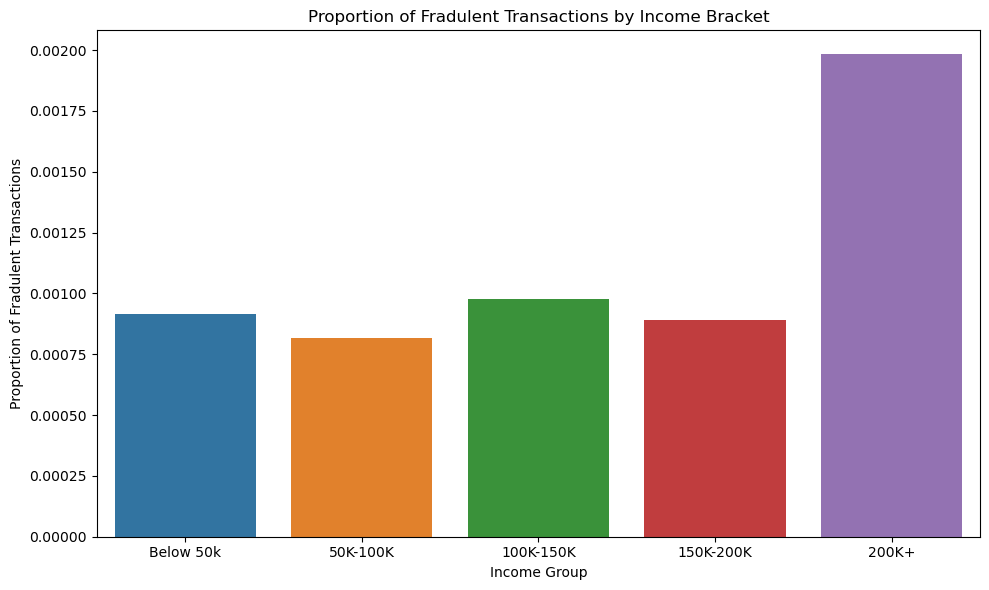

In [44]:
# Create income groups (bins)
bins = [30000, 50000, 100000, 150000, 200000, 400000]  # Define income ranges
labels = ['Below 50k', '50K-100K', '100K-150K', '150K-200K', '200K+']
df_offline.loc[:,'income_group'] = pd.cut(df_offline['yearly_income'], bins=bins, labels=labels, right=False)

# Calculate the proportion of target = 1 for each income group
# Mean gives the proportion of target = 1
grouped = df_offline.groupby('income_group')['target'].mean().reset_index()

# Plot the proportions as a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='income_group', y='target', data=grouped, palette='tab10')

# Adding labels and title
plt.xlabel('Income Group')
plt.ylabel('Proportion of Fradulent Transactions')
plt.title('Proportion of Fradulent Transactions by Income Bracket')

plt.tight_layout()
plt.show()

C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\1753130342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_online.loc[:, 'age_group'] = pd.cut(df_online['current_age'], bins=bins, labels=labels, right=False)
C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\1753130342.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_online.groupby('age_group')['target'].mean().reset_index()
C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\1753130342.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

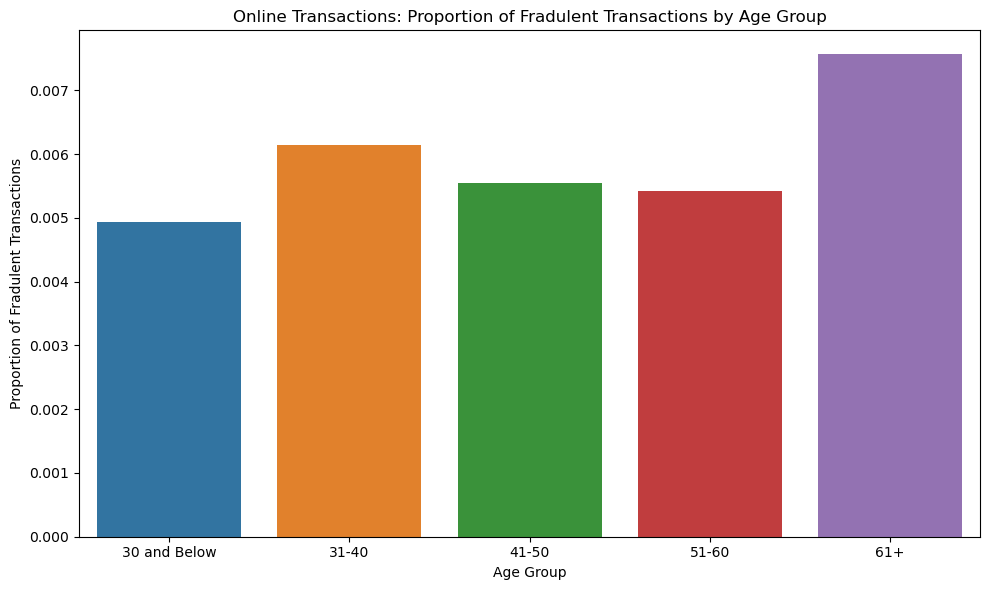

In [45]:
# Create age groups
bins = [0, 30, 40, 50, 60, 120]  # Define age group ranges
labels = ['30 and Below', '31-40', '41-50', '51-60', '61+']
df_online.loc[:, 'age_group'] = pd.cut(df_online['current_age'], bins=bins, labels=labels, right=False)

# Calculate the proportion of target = 1 for each age group
grouped = df_online.groupby('age_group')['target'].mean().reset_index()

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='target', data=grouped, palette='tab10')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Proportion of Fradulent Transactions')
plt.title('Online Transactions: Proportion of Fradulent Transactions by Age Group')

plt.tight_layout()
plt.show()

C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\2811307790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_online.loc[:,'income_group'] = pd.cut(df_online['yearly_income'], bins=bins, labels=labels, right=False)
C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\2811307790.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_online.groupby('income_group')['target'].mean().reset_index()
C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\2811307790.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov

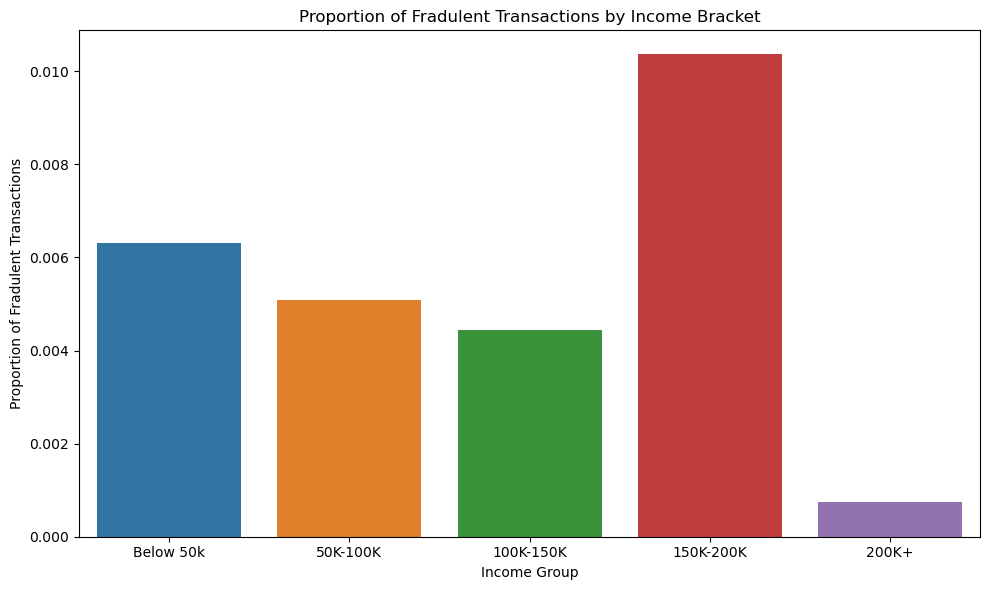

In [46]:
# Create income groups (bins)
bins = [30000, 50000, 100000, 150000, 200000, 400000]  # Define income ranges
labels = ['Below 50k', '50K-100K', '100K-150K', '150K-200K', '200K+']
df_online.loc[:,'income_group'] = pd.cut(df_online['yearly_income'], bins=bins, labels=labels, right=False)

# Calculate the proportion of target = 1 for each income group
# Mean gives the proportion of target = 1
grouped = df_online.groupby('income_group')['target'].mean().reset_index()

# Plot the proportions as a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='income_group', y='target', data=grouped, palette='tab10')

# Adding labels and title
plt.xlabel('Income Group')
plt.ylabel('Proportion of Fradulent Transactions')
plt.title('Proportion of Fradulent Transactions by Income Bracket')

plt.tight_layout()
plt.show()

## Summary statistics

In [47]:
numeric_cols = ['transaction_amount','current_age','retirement_age',
                'per_capita_income','yearly_income','total_debt','credit_score','num_credit_cards','target']
df_offline[numeric_cols].describe()

,transaction_amount,current_age,retirement_age,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,target
count,3.677822e+06,3.677822e+06,3.677822e+06,3.677822e+06,3.677822e+06,3.677822e+06,3.677822e+06,3.677822e+06,3.677822e+06
mean,4.348485e+01,5.373194e+01,6.650918e+01,2.369001e+04,4.620970e+04,5.775279e+04,7.147734e+02,3.842848e+00,9.073305e-04
std,4.401180e+01,1.588416e+01,3.556820e+00,1.145851e+04,2.342863e+04,5.226607e+04,6.486578e+01,1.556665e+00,3.010826e-02
min,1.000000e-02,2.300000e+01,5.300000e+01,0.000000e+00,1.000000e+00,0.000000e+00,4.880000e+02,1.000000e+00,0.000000e+00
25%,9.560000e+00,4.200000e+01,6.500000e+01,1.694200e+04,3.252700e+04,1.633100e+04,6.850000e+02,3.000000e+00,0.000000e+00
50%,2.959000e+01,5.100000e+01,6.600000e+01,2.100500e+04,4.089400e+04,5.152000e+04,7.160000e+02,4.000000e+00,0.000000e+00
75%,6.500000e+01,6.300000e+01,6.800000e+01,2.695700e+04,5.376200e+04,8.416600e+04,7.570000e+02,5.000000e+00,0.000000e+00
max,2.641800e+02,1.010000e+02,7.900000e+01,1.631450e+05,2.801990e+05,4.618540e+05,8.500000e+02,9.000000e+00,1.000000e+00


In [48]:
corr_matrix = df_offline[numeric_cols].corr()

[]

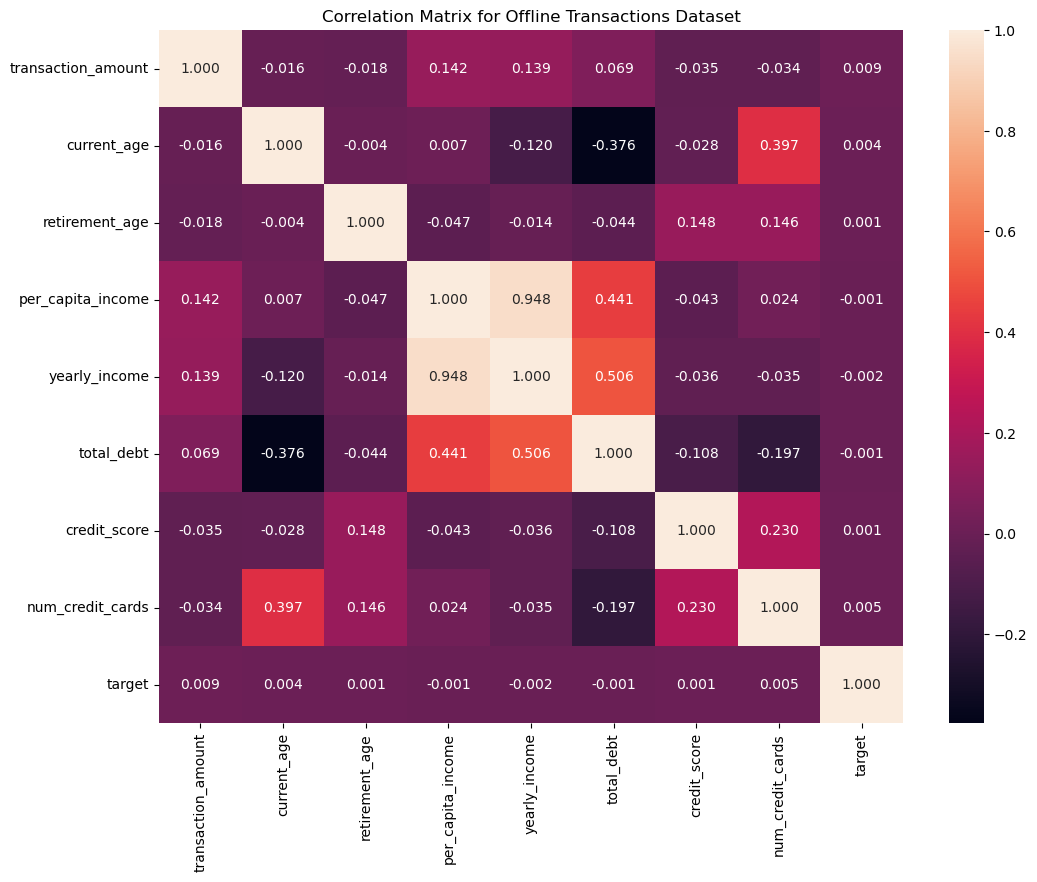

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix, annot=True, fmt=".3f")
plt.title("Correlation Matrix for Offline Transactions Dataset")
plt.plot()

[]

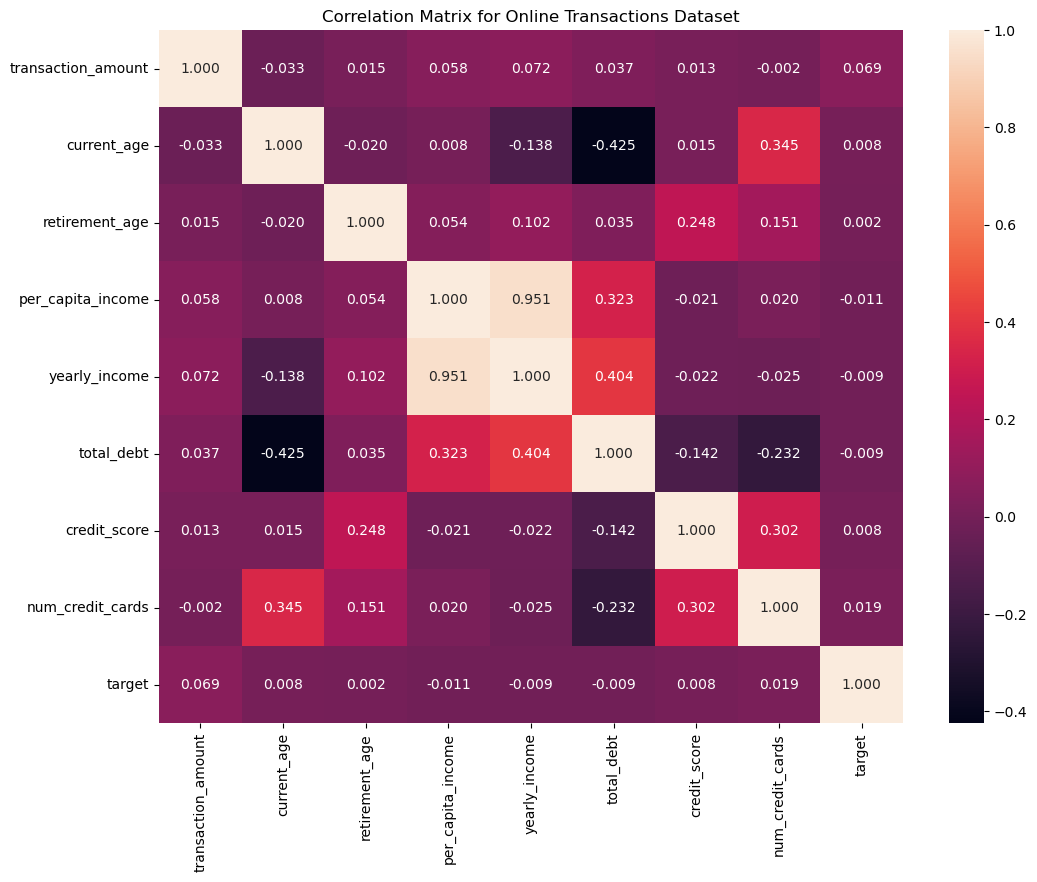

In [50]:
corr_matrix_online = df_online[numeric_cols].corr()

plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix_online, annot=True, fmt=".3f")
plt.title("Correlation Matrix for Online Transactions Dataset")
plt.plot()

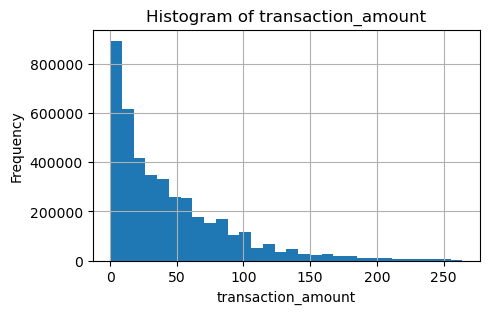

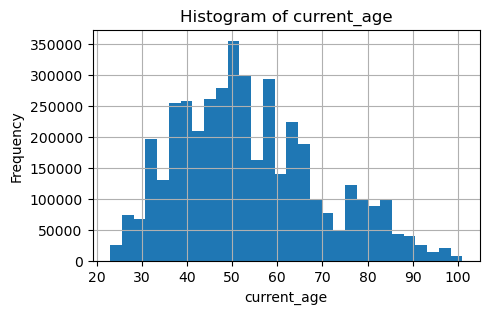

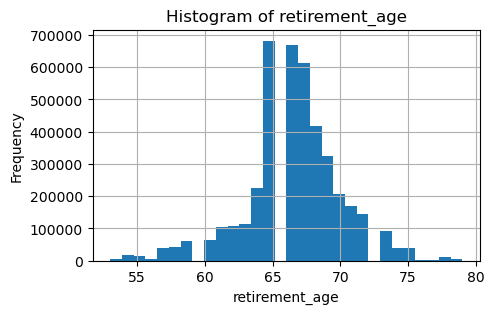

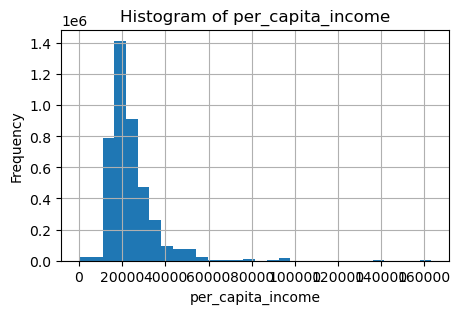

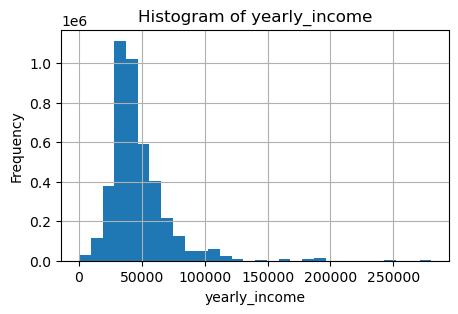

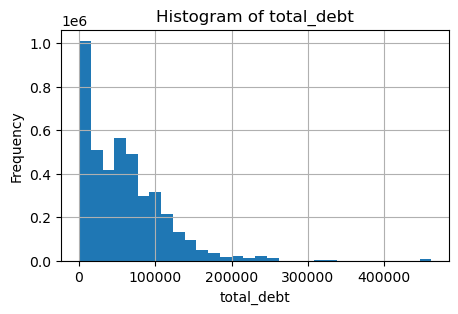

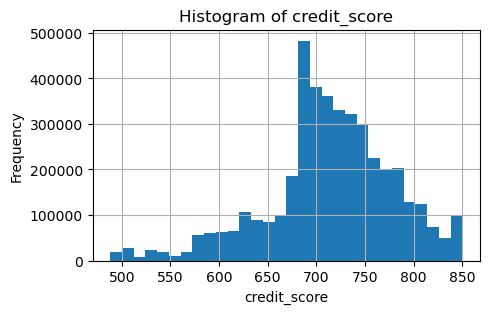

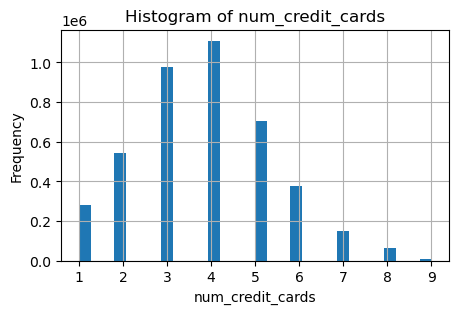

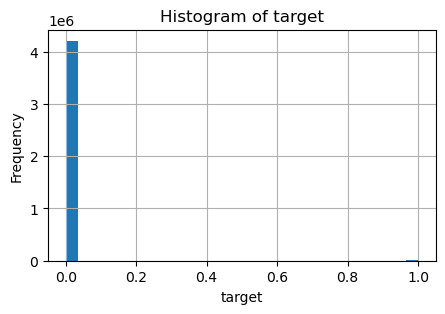

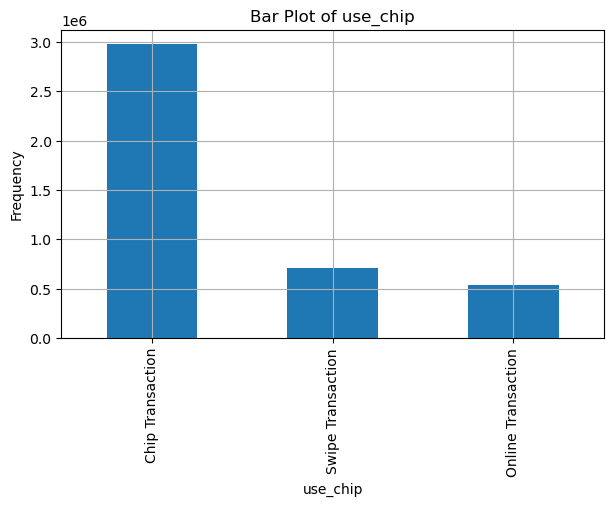

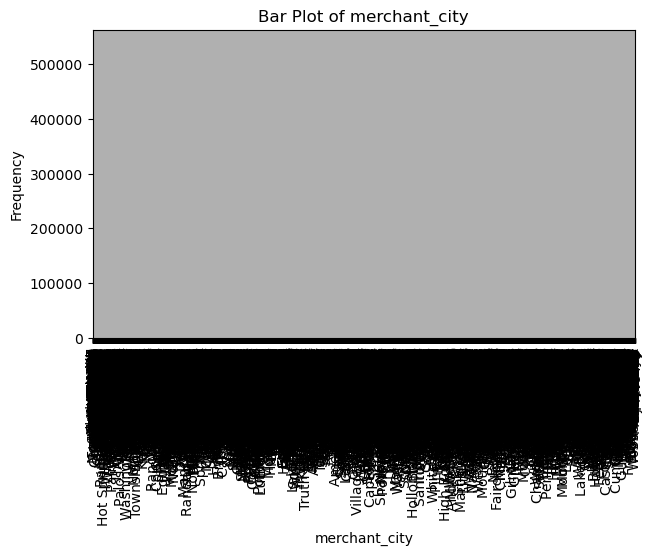

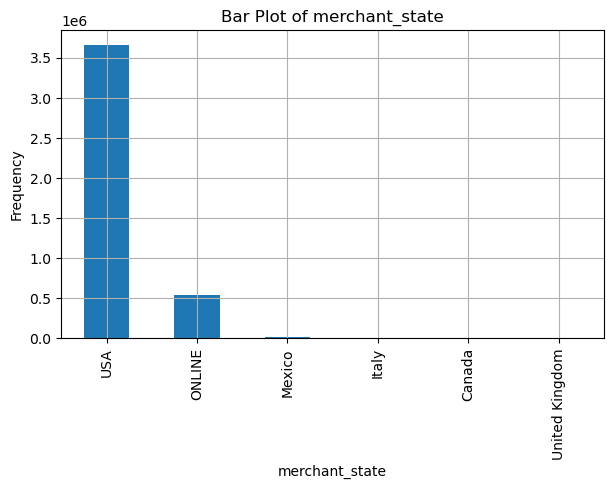

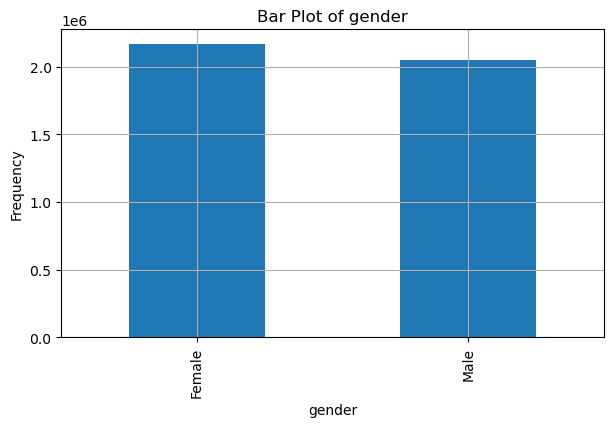

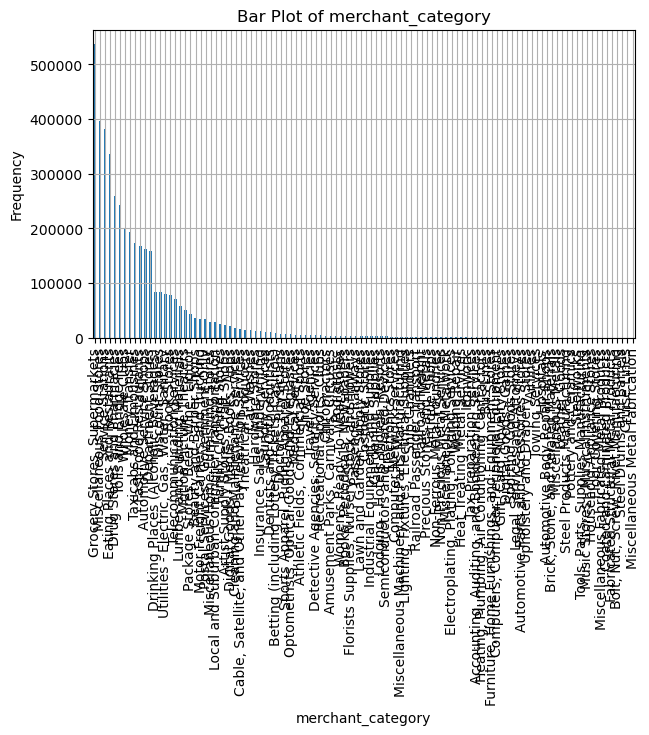

In [51]:
import matplotlib.pyplot as plt

# Plot histograms for numerical fields
for field in numeric_cols:
    plt.figure(figsize=(5, 3))
    df[field].hist(bins=30)
    plt.title(f'Histogram of {field}')
    plt.xlabel(field)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot bar plots for categorical fields
for field in categorical_cols:
    plt.figure(figsize=(7, 4))
    df[field].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {field}')
    plt.xlabel(field)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

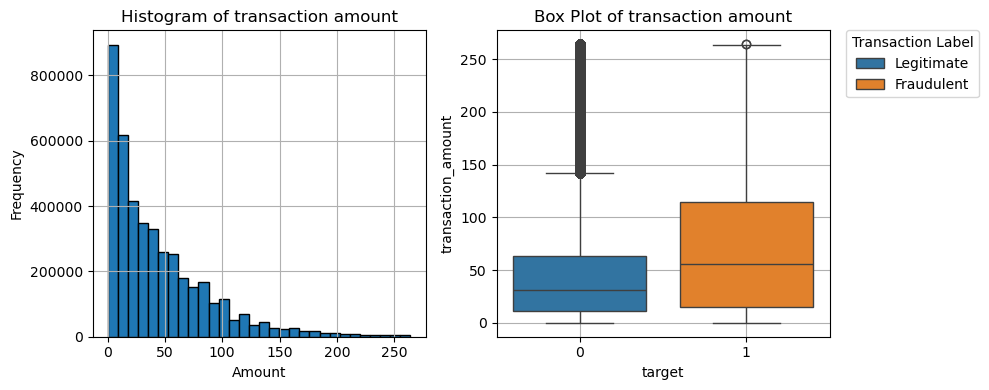

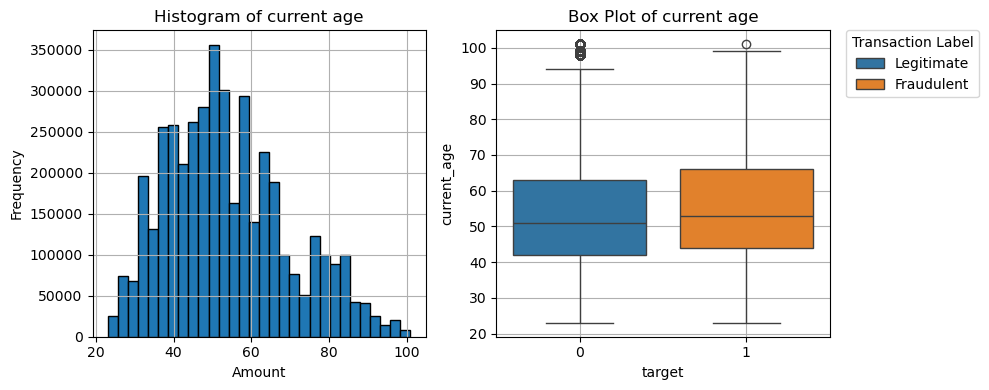

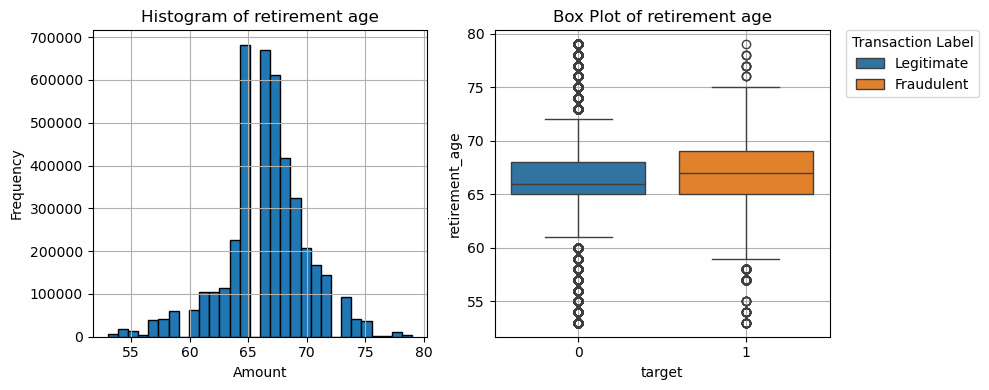

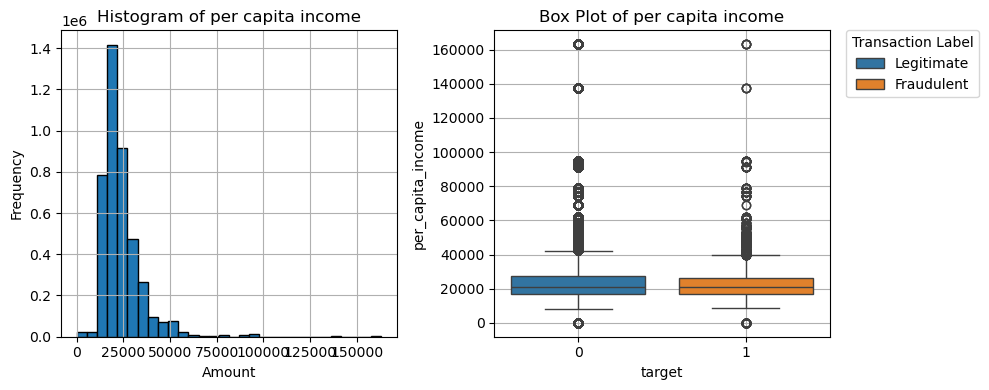

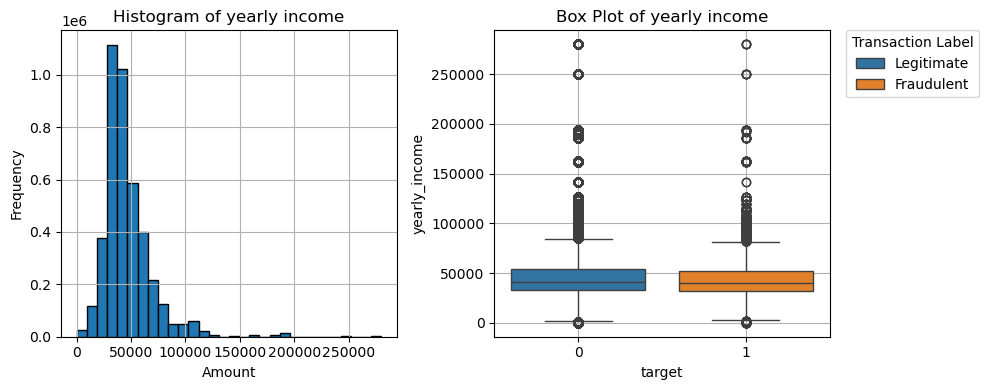

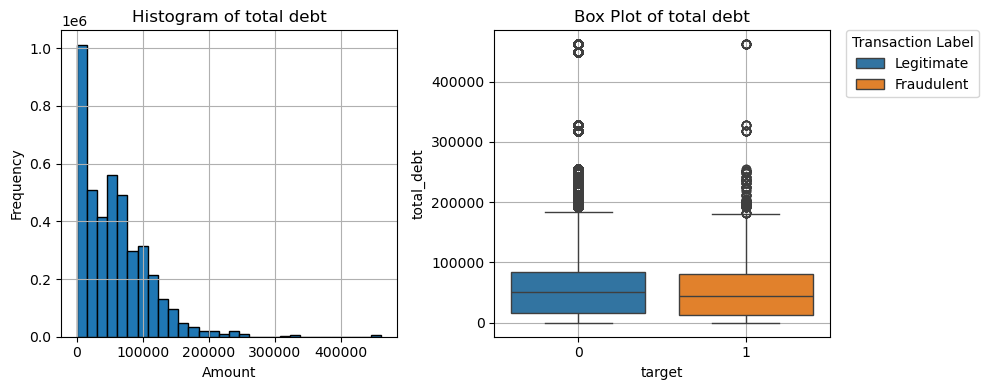

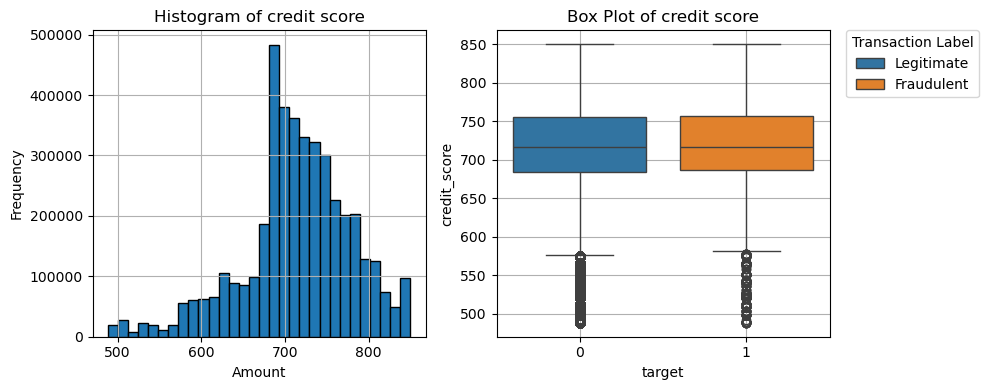

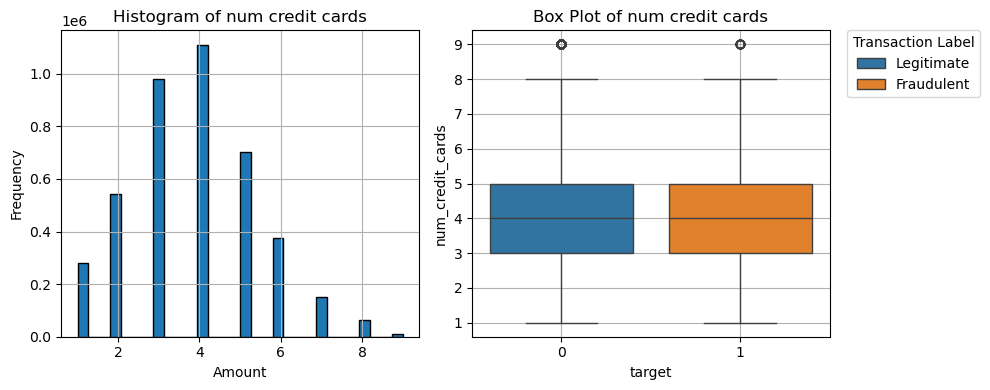

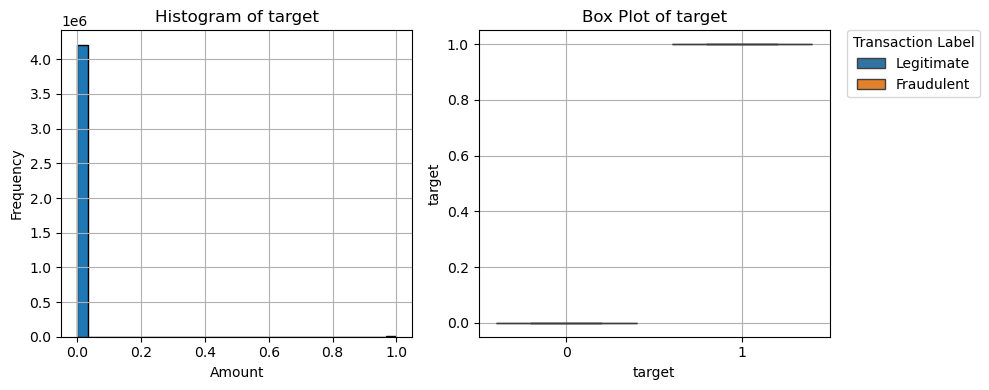

In [52]:
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Set (rows, cols), figure size

    # Histogram
    axes[0].hist(df[col], bins=30, edgecolor='black')
    axes[0].set_title(f'Histogram of {col.replace("_", " ")}')
    axes[0].set_xlabel('Amount')  
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True)

    # Box Plot
    sns.boxplot(y=col, x='target', data=df, ax=axes[1], hue='target') 
    axes[1].set_title(f'Box Plot of {col.replace("_", " ")}')
    axes[1].grid(True)

    # Fix legend position (move it outside)
    handles, labels = axes[1].get_legend_handles_labels()
    axes[1].legend(handles, ['Legitimate', 'Fraudulent'], title='Transaction Label',
                   loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


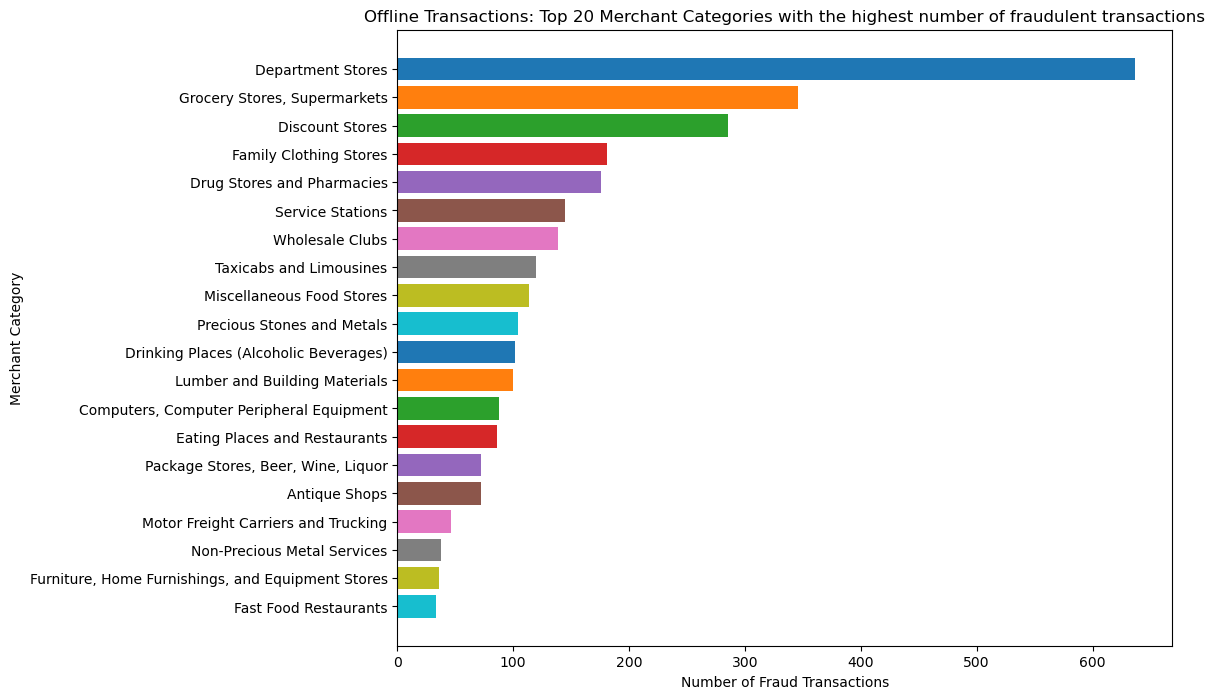

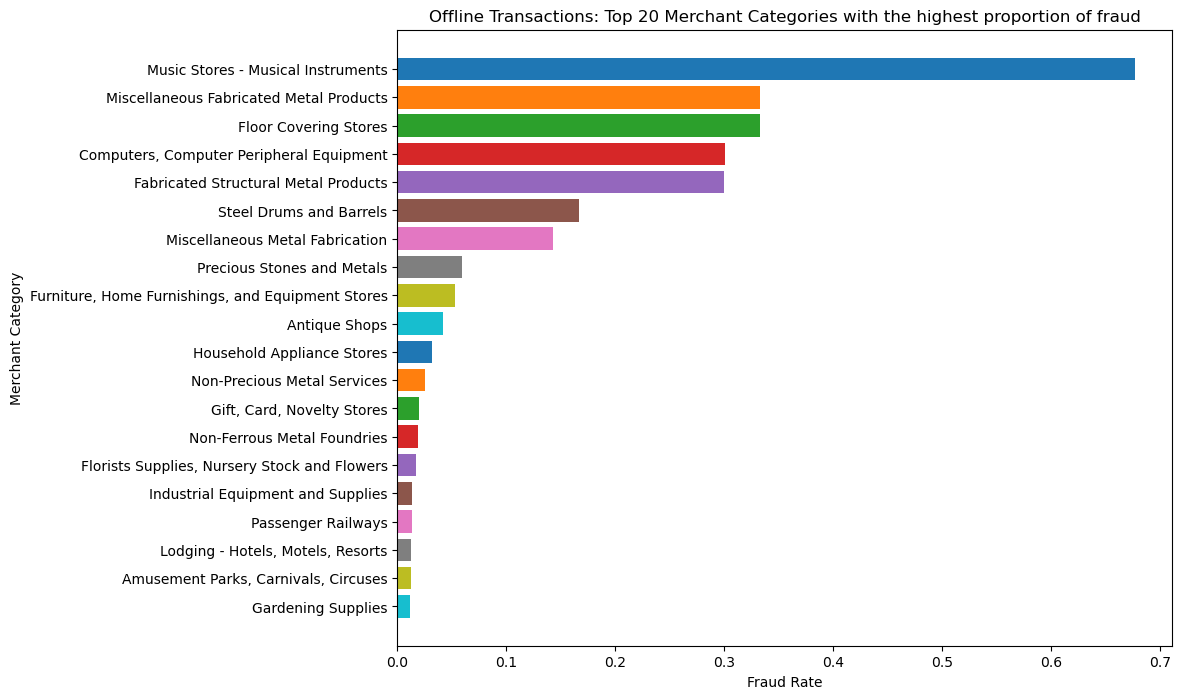

In [53]:
df_subset_offline = df_offline[['target', 'merchant_category','transaction_amount']].groupby('merchant_category', observed=False).agg(['sum', 'count','mean']).reset_index()

# Flatten the MultiIndex columns
df_subset_offline.columns = ['_'.join(col).strip('_') for col in df_subset_offline.columns.values]
df_subset_offline['proportion'] = df_subset_offline['target_sum'] / df_subset_offline['target_count']
# Define color palette
colors = sns.color_palette("tab10", 20)

plt.figure(figsize=(10, 8))
# Sort by the sum of the target column in descending order
df_subset_offline = df_subset_offline.sort_values('target_sum', ascending=False)
plt.barh('merchant_category','target_sum', data=df_subset_offline.head(20)[::-1], color = colors[::-1])
plt.xlabel('Number of Fraud Transactions')
plt.ylabel('Merchant Category')
plt.title('Offline Transactions: Top 20 Merchant Categories with the highest number of fraudulent transactions')
plt.show()

# Sort by the sum of the target column in descending order
df_subset_offline = df_subset_offline.sort_values('proportion', ascending=False)
plt.figure(figsize=(10, 8))
plt.barh('merchant_category','proportion', data=df_subset_offline.head(20)[::-1], color = colors[::-1])
plt.xlabel('Fraud Rate')
plt.ylabel('Merchant Category')
plt.title('Offline Transactions: Top 20 Merchant Categories with the highest proportion of fraud')
plt.show()

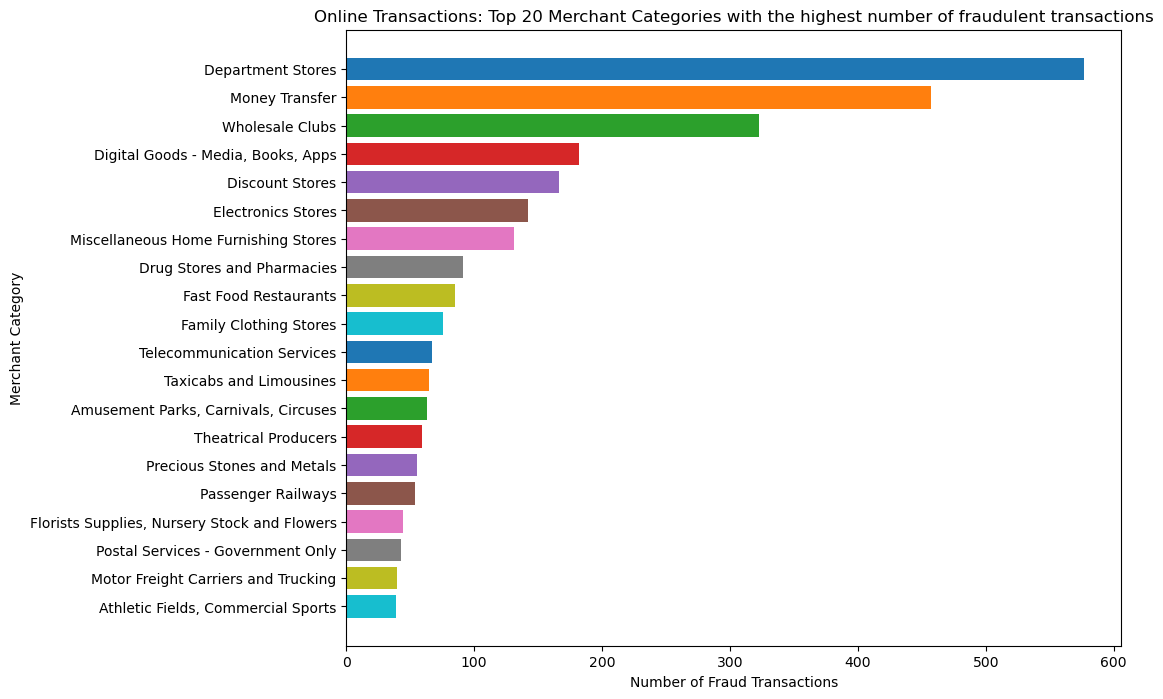

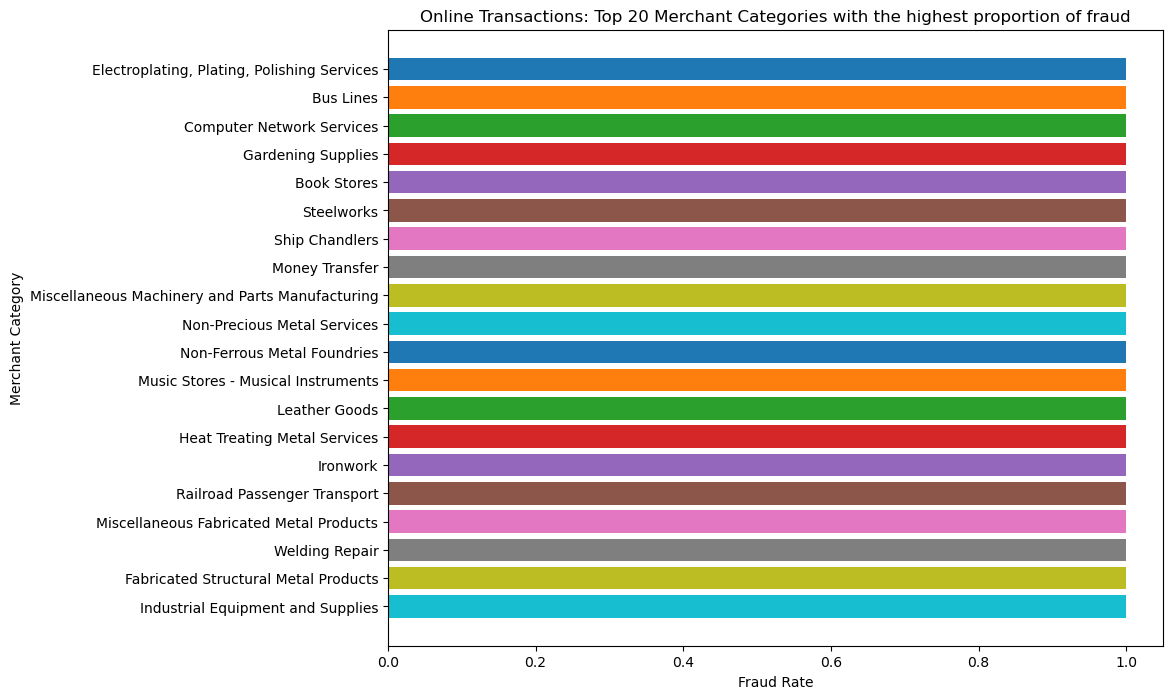

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset_online = df_online[['target', 'merchant_category','transaction_amount']].groupby('merchant_category', observed=False).agg(['sum', 'count','mean']).reset_index()

# Flatten the MultiIndex columns
df_subset_online.columns = ['_'.join(col).strip('_') for col in df_subset_online.columns.values]
df_subset_online['proportion'] = df_subset_online['target_sum'] / df_subset_online['target_count']
df_subset_online = df_subset_online[df_subset_online['target_count']> 0]
# Define color palette
colors = sns.color_palette("tab10", 20)

plt.figure(figsize=(10, 8))
# Sort by the sum of the target column in descending order
df_subset_online = df_subset_online.sort_values('target_sum', ascending=False)
plt.barh('merchant_category','target_sum', data=df_subset_online.head(20)[::-1], color = colors[::-1])
plt.xlabel('Number of Fraud Transactions')
plt.ylabel('Merchant Category')
plt.title('Online Transactions: Top 20 Merchant Categories with the highest number of fraudulent transactions')
plt.show()

# Sort by the sum of the target column in descending order
df_subset_online = df_subset_online.sort_values('proportion', ascending=False)
plt.figure(figsize=(10, 8))
plt.barh('merchant_category','proportion', data=df_subset_online.head(20)[::-1], color = colors[::-1])
plt.xlabel('Fraud Rate')
plt.ylabel('Merchant Category')
plt.title('Online Transactions: Top 20 Merchant Categories with the highest proportion of fraud')
plt.show()

# New features

In [59]:
df_offline['transaction_datetime'] = pd.to_datetime(df_offline['transaction_datetime'],format='%Y-%m-%d %H:%M:%S')
# Extract the hour from the datetime column
df_offline['transaction_hour'] = df_offline['transaction_datetime'].dt.hour
df_offline['transaction_month'] = df_offline['transaction_datetime'].dt.month
df_offline['transaction_day_of_week'] = df_offline['transaction_datetime'].dt.dayofweek

C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\2381841922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offline['transaction_datetime'] = pd.to_datetime(df_offline['transaction_datetime'],format='%Y-%m-%d %H:%M:%S')
C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\2381841922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offline['transaction_hour'] = df_offline['transaction_datetime'].dt.hour
C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\2381841922.py:4: SettingWithCopyWarning: 
A valu

In [60]:
# Group by hour and calculate the sum
hour_sum = df_offline.groupby('transaction_hour',observed=False)['target'].sum().reset_index()
hour_sum['proportion'] = hour_sum['target'] / hour_sum['target'].sum()

sorted_fraud_hours = hour_sum
sorted_fraud_hours['transaction_hour'] = sorted_fraud_hours['transaction_hour'].astype(int)
sorted_fraud_hours.sort_values('transaction_hour',inplace=True)
sorted_fraud_hours['transaction_hour'] = sorted_fraud_hours['transaction_hour'].astype('string')

# Group by day of week and calculate the sum
dow_sum = df_offline.groupby('transaction_day_of_week',observed=False)['target'].sum().reset_index()
dow_sum['proportion'] = dow_sum['target'] / dow_sum['target'].sum()

sorted_fraud_dow = dow_sum
sorted_fraud_dow['transaction_day_of_week'] = sorted_fraud_dow['transaction_day_of_week'].astype(int)
sorted_fraud_dow.sort_values('transaction_day_of_week',inplace=True)
sorted_fraud_dow['transaction_day_of_week'] = sorted_fraud_dow['transaction_day_of_week'].astype('string')

# Group by day of week and calculate the sum
mth_sum = df_offline.groupby('transaction_month',observed=False)['target'].sum().reset_index()
mth_sum['proportion'] = mth_sum['target'] / mth_sum['target'].sum()

sorted_fraud_mth = mth_sum
sorted_fraud_mth['transaction_month'] = sorted_fraud_mth['transaction_month'].astype(int)
sorted_fraud_mth.sort_values('transaction_month',inplace=True)
sorted_fraud_mth['transaction_month'] = sorted_fraud_mth['transaction_month'].astype('string')

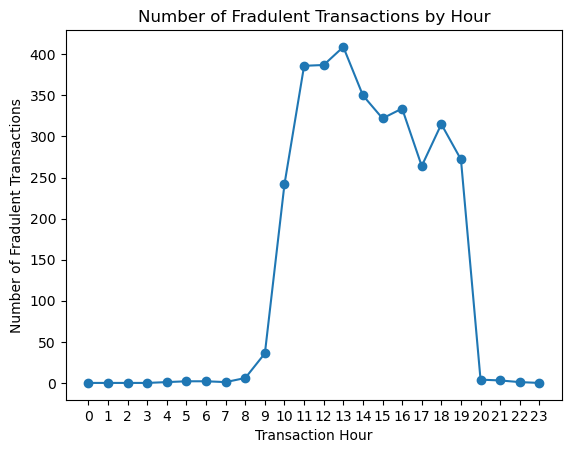

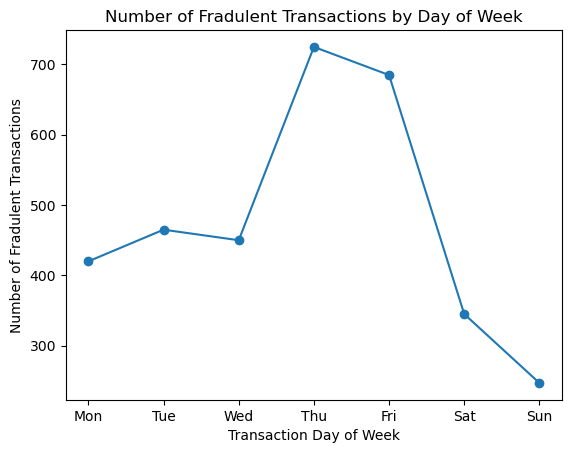

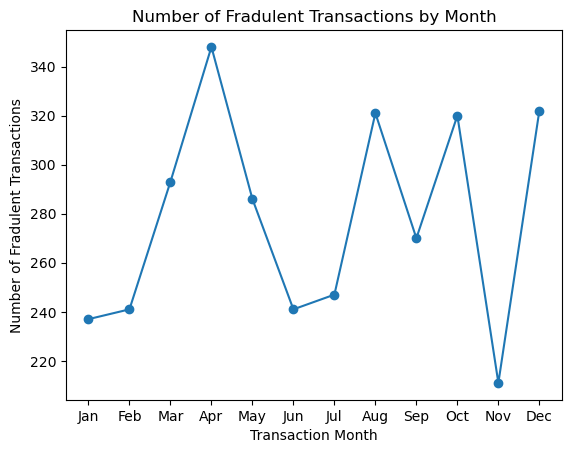

In [61]:
plt.plot(sorted_fraud_hours['transaction_hour'],sorted_fraud_hours['target'], 'o-')
plt.title('Number of Fradulent Transactions by Hour')
plt.xticks(rotation=0)
plt.xlabel('Transaction Hour')
plt.ylabel('Number of Fradulent Transactions')
plt.show()

plt.plot(sorted_fraud_dow['transaction_day_of_week'],sorted_fraud_dow['target'],'o-')
plt.title('Number of Fradulent Transactions by Day of Week')
plt.xticks(rotation=0)
plt.xlabel('Transaction Day of Week')
plt.ylabel('Number of Fradulent Transactions')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

plt.plot(sorted_fraud_mth['transaction_month'],sorted_fraud_mth['target'],'o-')
plt.title('Number of Fradulent Transactions by Month')
plt.xticks(rotation=0)
plt.xlabel('Transaction Month')
plt.ylabel('Number of Fradulent Transactions')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [62]:
df_online['transaction_datetime'] = pd.to_datetime(df_online['transaction_datetime'],format='%Y-%m-%d %H:%M:%S')
# Extract the hour from the datetime column
df_online['transaction_hour'] = df_online['transaction_datetime'].dt.hour
df_online['transaction_month'] = df_online['transaction_datetime'].dt.month
df_online['transaction_day_of_week'] = df_online['transaction_datetime'].dt.dayofweek

# Group by hour and calculate the sum
hour_sum = df_online.groupby('transaction_hour',observed=False)['target'].sum().reset_index()
hour_sum['proportion'] = hour_sum['target'] / hour_sum['target'].sum()

sorted_fraud_hours = hour_sum
sorted_fraud_hours['transaction_hour'] = sorted_fraud_hours['transaction_hour'].astype(int)
sorted_fraud_hours.sort_values('transaction_hour',inplace=True)
sorted_fraud_hours['transaction_hour'] = sorted_fraud_hours['transaction_hour'].astype('string')

# Group by day of week and calculate the sum
dow_sum = df_online.groupby('transaction_day_of_week',observed=False)['target'].sum().reset_index()
dow_sum['proportion'] = dow_sum['target'] / dow_sum['target'].sum()

sorted_fraud_dow = dow_sum
sorted_fraud_dow['transaction_day_of_week'] = sorted_fraud_dow['transaction_day_of_week'].astype(int)
sorted_fraud_dow.sort_values('transaction_day_of_week',inplace=True)
sorted_fraud_dow['transaction_day_of_week'] = sorted_fraud_dow['transaction_day_of_week'].astype('string')

# Group by day of week and calculate the sum
mth_sum = df_online.groupby('transaction_month',observed=False)['target'].sum().reset_index()
mth_sum['proportion'] = mth_sum['target'] / mth_sum['target'].sum()

sorted_fraud_mth = mth_sum
sorted_fraud_mth['transaction_month'] = sorted_fraud_mth['transaction_month'].astype(int)
sorted_fraud_mth.sort_values('transaction_month',inplace=True)
sorted_fraud_mth['transaction_month'] = sorted_fraud_mth['transaction_month'].astype('string')

C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\3531010665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_online['transaction_datetime'] = pd.to_datetime(df_online['transaction_datetime'],format='%Y-%m-%d %H:%M:%S')
C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\3531010665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_online['transaction_hour'] = df_online['transaction_datetime'].dt.hour
C:\Users\Chuaw\AppData\Local\Temp\ipykernel_5976\3531010665.py:4: SettingWithCopyWarning: 
A value is

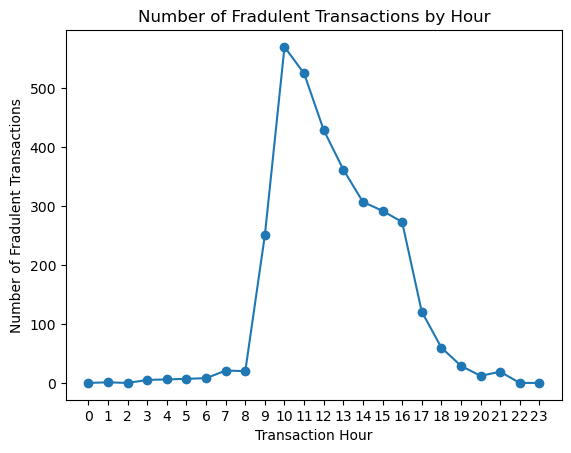

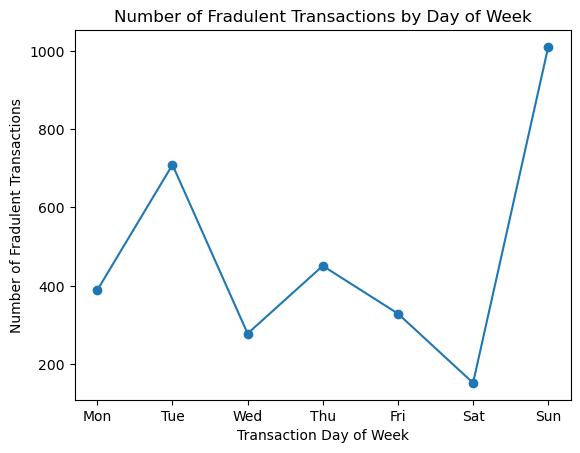

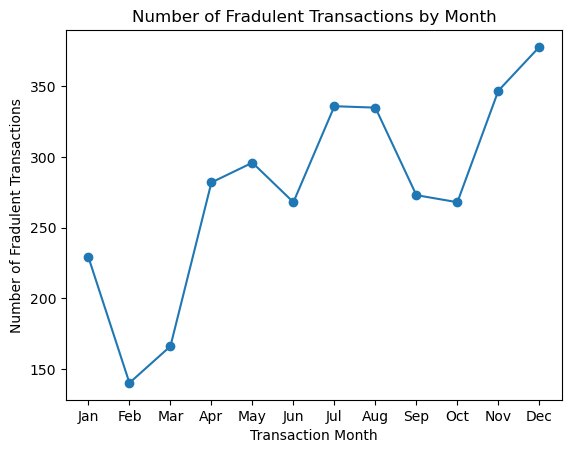

In [63]:
plt.plot(sorted_fraud_hours['transaction_hour'],sorted_fraud_hours['target'], 'o-')
plt.title('Number of Fradulent Transactions by Hour')
plt.xticks(rotation=0)
plt.xlabel('Transaction Hour')
plt.ylabel('Number of Fradulent Transactions')
plt.show()

plt.plot(sorted_fraud_dow['transaction_day_of_week'],sorted_fraud_dow['target'],'o-')
plt.title('Number of Fradulent Transactions by Day of Week')
plt.xticks(rotation=0)
plt.xlabel('Transaction Day of Week')
plt.ylabel('Number of Fradulent Transactions')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

plt.plot(sorted_fraud_mth['transaction_month'],sorted_fraud_mth['target'],'o-')
plt.title('Number of Fradulent Transactions by Month')
plt.xticks(rotation=0)
plt.xlabel('Transaction Month')
plt.ylabel('Number of Fradulent Transactions')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()